In [13]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error

from sklearn.decomposition import PCA 

Reduce the time a Mercedes-Benz spends on the test bench.

#### Problem Statement Scenario:
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with the crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, Daimlers engineers have developed a robust testing system. As one of the worlds biggest manufacturers of premium cars, safety and efficiency are paramount on Daimlerís production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Daimlerís standards.

1. Data Exploration

In [14]:
# load 'test.zip'

test = pd.read_csv("test.zip")
test.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [15]:
# load 'train.zip'

df = pd.read_csv("train.zip")
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.shape

(4209, 378)

In [17]:
type(df)

pandas.core.frame.DataFrame

In [18]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [19]:
for c in df.columns:
    if df[c].dtype == object:
        print(c)

X0
X1
X2
X3
X4
X5
X6
X8


In [20]:
des = df.describe()
print(des)

                ID            y          X10     X11          X12  \
count  4209.000000  4209.000000  4209.000000  4209.0  4209.000000   
mean   4205.960798   100.669318     0.013305     0.0     0.075077   
std    2437.608688    12.679381     0.114590     0.0     0.263547   
min       0.000000    72.110000     0.000000     0.0     0.000000   
25%    2095.000000    90.820000     0.000000     0.0     0.000000   
50%    4220.000000    99.150000     0.000000     0.0     0.000000   
75%    6314.000000   109.010000     0.000000     0.0     0.000000   
max    8417.000000   265.320000     1.000000     0.0     1.000000   

               X13          X14          X15          X16          X17  ...  \
count  4209.000000  4209.000000  4209.000000  4209.000000  4209.000000  ...   
mean      0.057971     0.428130     0.000475     0.002613     0.007603  ...   
std       0.233716     0.494867     0.021796     0.051061     0.086872  ...   
min       0.000000     0.000000     0.000000     0.000000     

In [21]:
# drop the 'ID' and 'y' column. Create the target dataframe y. 

y = df['y']
df2 = df.drop(['ID','y'], axis=1)
test = test.drop(['ID'], axis=1)
print(y.shape)
print(df2.shape)
print(test.shape)

(4209,)
(4209, 376)
(4209, 376)


2. Data wrangling

In [22]:
# No missing data

df2.isna().any().unique()

array([False])

In [23]:


pd.unique(df2.iloc[:,0:377].values.flatten())

array(['k', 'v', 'at', 'a', 'd', 'u', 'j', 'o', 0, 1, 't', 'av', 'e', 'y',
       'l', 'az', 'w', 'n', 'c', 'x', 'f', 'h', 'b', 'g', 's', 'al', 'r',
       'as', 'i', 'aq', 'p', 'ai', 'm', 'ak', 'ay', 'aa', 'aj', 'q', 'am',
       'ae', 'z', 'ap', 'af', 'ag', 'ac', 'aw', 'ba', 'ao', 'ax', 'au',
       'bc', 'an', 'ad', 'ah', 'ab', 'ar'], dtype=object)

In [24]:
for c in df2.columns:
    if df2[c].dtype=='object' or test[c].dtype=='object':
        print(c)

X0
X1
X2
X3
X4
X5
X6
X8


In [25]:
# label encoder for categorical data

le = LabelEncoder()

for c in df2.columns:
    if df2[c].dtype=='object' or test[c].dtype=='object':
        le.fit(np.concatenate((df2[c], test[c]), axis=None))
        df2[c] = le.transform(df2[c])
        test[c] = le.transform(test[c])

In [26]:
# remove columns with zero variance

d=[]
for c in df2.columns:
    if df2[c].std()==0 and test[c].std()==0:
        d.append(c)
        
print(d)



[]


In [27]:
df3 = df2.drop(d, axis=1)
test = test.drop(d, axis=1)
print(df3.shape)
print(test.shape)

(4209, 376)
(4209, 376)


In [28]:
df3.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,37,23,20,0,3,27,9,14,0,0,...,0,0,1,0,0,0,0,0,0,0
1,37,21,22,4,3,31,11,14,0,0,...,1,0,0,0,0,0,0,0,0,0
2,24,24,38,2,3,30,9,23,0,0,...,0,0,0,0,0,0,1,0,0,0
3,24,21,38,5,3,30,11,4,0,0,...,0,0,0,0,0,0,0,0,0,0
4,24,23,38,5,3,14,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,24,23,38,5,3,26,0,22,0,0,...,0,0,0,1,0,0,0,0,0,0
1,46,3,9,0,3,9,6,24,0,0,...,0,0,1,0,0,0,0,0,0,0
2,24,23,19,5,3,0,9,9,0,0,...,0,0,0,1,0,0,0,0,0,0
3,24,13,38,5,3,32,11,13,0,0,...,0,0,0,1,0,0,0,0,0,0
4,49,20,19,2,3,31,8,12,0,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
corr_matrix = df3.corr().abs()

(array([  0.5,  15.5,  30.5,  45.5,  60.5,  75.5,  90.5, 105.5, 120.5,
        135.5, 150.5, 165.5, 180.5, 195.5, 210.5, 225.5, 240.5, 255.5,
        270.5, 285.5, 300.5, 315.5, 330.5, 345.5, 360.5, 375.5]),
 [Text(0.5, 0, 'X0'),
  Text(15.5, 0, 'X17'),
  Text(30.5, 0, 'X33'),
  Text(45.5, 0, 'X48'),
  Text(60.5, 0, 'X63'),
  Text(75.5, 0, 'X79'),
  Text(90.5, 0, 'X94'),
  Text(105.5, 0, 'X109'),
  Text(120.5, 0, 'X125'),
  Text(135.5, 0, 'X140'),
  Text(150.5, 0, 'X156'),
  Text(165.5, 0, 'X171'),
  Text(180.5, 0, 'X186'),
  Text(195.5, 0, 'X203'),
  Text(210.5, 0, 'X218'),
  Text(225.5, 0, 'X233'),
  Text(240.5, 0, 'X248'),
  Text(255.5, 0, 'X263'),
  Text(270.5, 0, 'X278'),
  Text(285.5, 0, 'X293'),
  Text(300.5, 0, 'X309'),
  Text(315.5, 0, 'X324'),
  Text(330.5, 0, 'X339'),
  Text(345.5, 0, 'X354'),
  Text(360.5, 0, 'X369'),
  Text(375.5, 0, 'X385')])

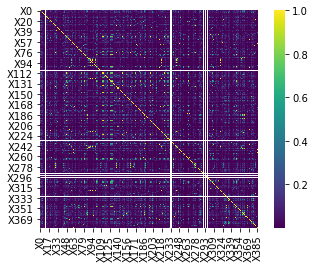

In [31]:
sns.heatmap(data = corr_matrix,square = True, cmap = "viridis")

plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [32]:
# drop highly correlated columns

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [33]:
df3 = df3.drop(df3[to_drop], axis=1)
test = test.drop(test[to_drop], axis=1)

In [34]:
df3.shape

(4209, 294)

In [35]:
test.shape

(4209, 294)

In [36]:
# Oulier removal on the columns with more than two values


from scipy import stats

z = np.abs(stats.zscore(df3))
print(z)

d=[]
for r in range(0,4209):
    if (z[r,0:8]>3).any():
        d.append(r)
        
print(d)

X= df3.drop(df3.index[d], axis=0)
X.shape


[[0.17014909 1.39348787 0.02909754 ... 0.09024252 0.04081511 0.02180363]
 [0.17014909 1.15902093 0.14255146 ... 0.09024252 0.04081511 0.02180363]
 [0.68578986 1.51072134 1.51574348 ... 0.09024252 0.04081511 0.02180363]
 ...
 [1.60757028 1.39348787 1.85904149 ... 0.09024252 0.04081511 0.02180363]
 [1.54172882 0.924554   0.74332297 ... 0.09024252 0.04081511 0.02180363]
 [1.15777097 0.924554   1.31646507 ... 0.09024252 0.04081511 0.02180363]]
[1307, 1308, 1309, 1310]


/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


(4205, 294)

In [37]:
y = target.drop(target.index[d], axis=0)

In [38]:
y.shape

(4205,)

In [39]:
#P1 = df2.quantile(0.01)
#P99 = df2.quantile(0.99)
#IQR = Q3 - Q1

#df3= df2[~((df2 < (P1)) |(df2 > (P99))).any(axis=1)]
#df3.shape

In [40]:
#df3=df2

3. Model validation using XGBoost 

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape)

(2943, 294)


In [44]:
def xgb_model(pca, depth, n_est, X_train, X_val, y_train, y_val):


    sklearn_pca= PCA(n_components= pca)
    sklearn_pca.fit(X_train)
    X_train_pca= sklearn_pca.transform(X_train)
    #print(X_train_pca.shape)

    X_val_pca=sklearn_pca.transform(X_val)
    #print(X_val_pca.shape)


    xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.3, max_depth = depth, n_estimators = n_est)

    xg_reg.fit(X_train_pca,y_train)


    y_pred = xg_reg.predict(X_val_pca)


    rmse = np.sqrt(mean_squared_error(y_pred, y_val))
    r2=r2_score(y_val, y_pred)


    return  rmse, r2

In [45]:
par = ()

v1, v2 = xgb_model(0.95, 1, 100, X_train, X_val, y_train, y_val)

for pca in (0.95, 0.99, 0.999):
    for depth in (1,2,3,5):
        for n_est in (100, 300, 400, 500, 700):
            e1, e2  = xgb_model(pca, depth, n_est, X_train, X_val, y_train, y_val)
            if e1 < v1 and e2 > v2:
                v1 = e1
                v2 = e2
                par = pca, depth, n_est
                e = e1, e2
    
print(par, e)        

(0.999, 1, 300) (8.242208031581573, 0.5556794205077304)


In [46]:
sklearn_pca= PCA(n_components= 0.999)

X_pca = sklearn_pca.fit_transform(X)
print(X_pca.shape)

test_pca = sklearn_pca.transform(test)
print(test_pca.shape)

(4205, 97)
(4209, 97)


In [47]:
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = 0.3, learning_rate = 0.3, max_depth = 1, n_estimators = 300)

In [48]:
xg_reg.fit(X_pca,y)

[11:58:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.3, max_delta_step=0,
             max_depth=1, min_child_weight=1, missing=None, n_estimators=300,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [51]:
pred = xg_reg.predict(test_pca)

In [52]:
pred[0:10]

array([ 77.892685,  93.10698 ,  79.70965 ,  78.2975  , 110.824234,
        90.468605, 108.81656 ,  93.3542  , 117.12013 ,  95.76484 ],
      dtype=float32)